### 통계분석(수오전, 김세중 교수님) 과제 #05
#### UST ETRI 스쿨 인공지능 전공 02221081 황지현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.optimize import curve_fit
import scipy.stats as stats

# Hypotheses Testing / ANOVA

## Q1. Hypotheses Testing on One Sample

Automatic identification of the boundaries of significant structures within a medical image is an area of ongoing research. The paper “Automatic Segmentation of Medical Images Using Image Registration: Diagnostic and Simulation Applications” discussed a new technique for such identification. A measure of the accuracy of the automatic region is the average linear displacement (ALD). The paper gave the following ALD observations for a sample of 49 kidneys (units of pixel dimensions).

#### samples (n=50)
- 1.38, 0.54, 0.82, 0.41, 0.52, 0.44, 0.83, 1.10, 0.58, 0.58, 
- 1.09, 0.58, 0.65, 0.66, 1.11, 0.75, 0.64, 0.99, 0.54, 0.34, 
- 0.66, 1.30, 0.56, 0.83, 1.25, 1.28, 0.57, 0.56, 0.59, 0.38, 
- 0.51, 0.43, 0.64, 0.51, 1.44, 0.39, 0.62, 0.45, 1.04, 1.28, 
- 0.70, 1.00, 0.82, 0.85, 0.51, 0.46, 1.05, 1.06, 0.45, 0.46

In [2]:
sample_data = [1.38, 0.54, 0.82, 0.41, 0.52, 0.44, 0.83, 1.10, 0.58, 0.58,
        1.09, 0.58, 0.65, 0.66, 1.11, 0.75, 0.64, 0.99, 0.54, 0.34, 
        0.66, 1.30, 0.56, 0.83, 1.25, 1.28, 0.57, 0.56, 0.59, 0.38, 
        0.51, 0.43, 0.64, 0.51, 1.44, 0.39, 0.62, 0.45, 1.04, 1.28, 
        0.70, 1.00, 0.82, 0.85, 0.51, 0.46, 1.05, 1.06, 0.45, 0.46]

print(len(sample_data))

50


### 1. Show that this sample data satisfies the normality by using normality probability plot.

In [3]:
# Sort sample data in the ascending order
sample_sorted = np.sort(sample_data)

# Calculate indices corresponding to the sorted sample data
n = len(sample_sorted)
idx = np.arange(1, 1+len(sample_sorted), 1)

# Calculate sample percentages corresponding to the indices of the sorted sample. 
sample_percent = (idx-0.5)/n

# Assume one possible distribution of population
z = norm(loc=0, scale=1.0)

# Calculate percentiles of the assumed distribution corresponding to the sample percentages
percentiles = z.ppf(sample_percent)

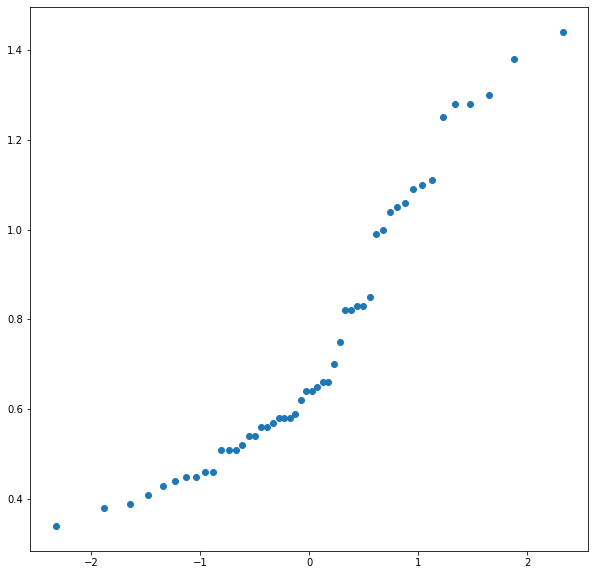

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Compare sorted sample data and percentiles calculated above
ax.plot(percentiles, sample_sorted, marker="o", lw=0)
plt.show()

In [5]:
def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, percentiles, sample_sorted)
y_fitted = func(percentiles, popt[0], popt[1])

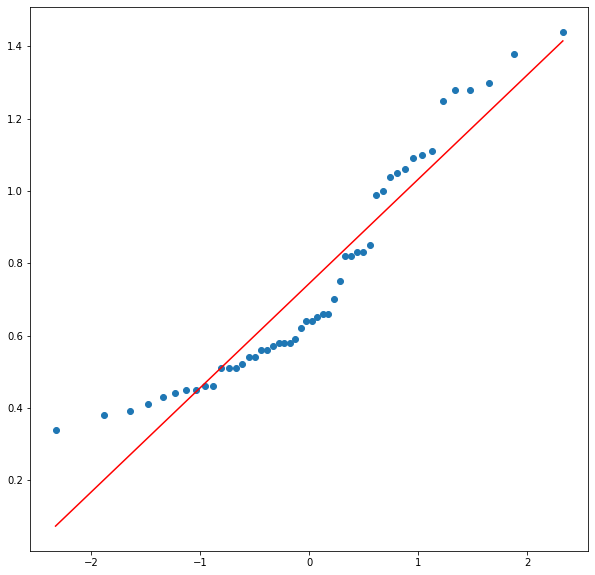

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# actual data
ax.plot(percentiles, sample_sorted, marker="o", lw=0) 
# fitted linear line
ax.plot(percentiles, y_fitted, color="red") 

plt.show()

#### 결론: 정규성을 만족한다.

### 2. Calculate the confidence interval of the population mean for the (1 − α = 0.95) confidence level.

In [7]:
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data)
print(sample_mean, sample_std)

0.7440000000000001 0.2991187055334387


In [8]:
# Set-up Confidence Level
alpha = 0.05
rv = norm(loc=0, scale=1.0)

lower_bound, upper_bound = rv.ppf(alpha*0.5), rv.ppf(1-alpha*0.5)
print(lower_bound, upper_bound)

-1.9599639845400545 1.959963984540054


In [9]:
# Result
lower_b = sample_mean + lower_bound*sample_std/np.sqrt(n)
upper_b = sample_mean + upper_bound*sample_std/np.sqrt(n)
print('CI: ({}, {})'.format(lower_b, upper_b))

CI: (0.6610900484133365, 0.8269099515866637)


### 3. Verify the hypothesis that the population mean is 1.0 by using the above sample data. For hypothesis testing, use the significance level α = 0.05.

In [10]:
alpha = 0.05
population_mean = 1

In [11]:
rv = norm(loc=0, scale=1)
print('기각영역: (∞,{})'.format(rv.ppf(alpha)))

기각영역: (∞,-1.6448536269514729)


In [12]:
sample_mean = np.mean(sample_data)
sample_std  = np.std(sample_data, ddof=1)

#  Calculate test statistic
z = (sample_mean - population_mean) / (sample_std/np.sqrt(len(sample_data)))
print('test statistic:', z)

test statistic: -5.990932585791331


#### 결론: z(-5.99)는 기각영역에 속한다. 그러므로 모집단 평균이 1.0이라는 가설은 기각한다.

## Q2. Inferences based on Two Samples

Here are Sample #1 and Sample #2 drawn from Population #1 and Population #2, respectively.

- Sample #1: 1.2, 0.9, 0.7, 1.0, 1.7, 1.7, 1.1, 0.9, 1.7, 1.9, 1.3, 2.1, 1.6, 1.8, 1.4, 1.3, 1.9, 1.6, 0.8, 2.0, 1.7, 1.6, 2.3, 2.0
- Sample #2: 1.6, 1.5, 1.1, 2.1, 1.5, 1.3, 1.0, 2.6

In [13]:
X = [1.2, 0.9, 0.7, 1.0, 1.7, 1.7, 1.1, 0.9, 1.7, 1.9, 1.3, 2.1, 1.6, 1.8, 1.4, 1.3, 1.9, 1.6, 0.8, 2.0, 1.7, 1.6, 2.3, 2.0]
Y = [1.6, 1.5, 1.1, 2.1, 1.5, 1.3, 1.0, 2.6]

### 1. Show that Samples #1 and # 2 satisfy the normality by using normality probability plot.

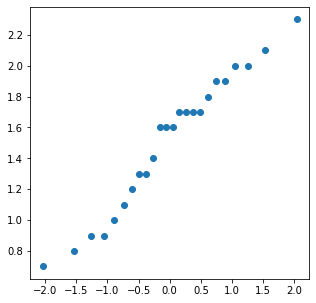

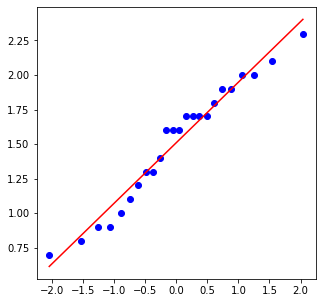

In [14]:
# Sample #1

sample_sorted = np.sort(X)
n = len(sample_sorted)
idx = np.arange(1, 1+len(sample_sorted), 1)
sample_percent = (idx-0.5)/n
z = norm(loc=0, scale=1.0)
percentiles = z.ppf(sample_percent)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, marker="o", lw=0)
plt.show()

popt, pcov = curve_fit(func, percentiles, sample_sorted)
y_fitted = func(percentiles, popt[0], popt[1])
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, color="blue", marker="o", lw=0) 
ax.plot(percentiles, y_fitted, color="red") 
plt.show()

#### 결론: Sample #1은 정규성을 만족한다.

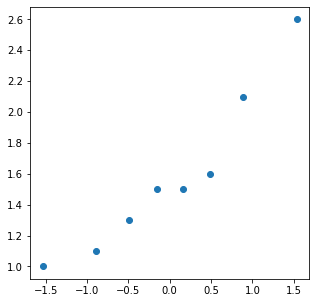

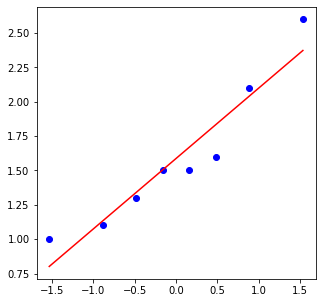

In [15]:
# Sample #2

sample_sorted = np.sort(Y)
n = len(sample_sorted)
idx = np.arange(1, 1+len(sample_sorted), 1)
sample_percent = (idx-0.5)/n
z = norm(loc=0, scale=1.0)
percentiles = z.ppf(sample_percent)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, marker="o", lw=0)
plt.show()

popt, pcov = curve_fit(func, percentiles, sample_sorted)
y_fitted = func(percentiles, popt[0], popt[1])
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(percentiles, sample_sorted, color="blue", marker="o", lw=0) 
ax.plot(percentiles, y_fitted, color="red") 
plt.show()

#### 결론: Sample #2은 정규성을 만족한다.

### 2. Verify that the population mean of the Population #1 is equal to that of the Population #2 by using the two-sample t-Test

In [16]:
# 문제에 alpha 값이 주어져 있지 않아서, 다른 문제들과 동일하게 0.05로 설정하였습니다.
alpha = 0.05
rv = norm(loc=0, scale=1)
lower_bound = rv.ppf(alpha)

m, n = len(X), len(Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)

In [17]:
# Determine the degree of freedom for t-distribution
t_df = (std_X**2/m + std_Y**2/n)**2 / ((std_X**2/m)**2 / (m-1) + (std_Y**2/n)**2 / (n-1))
print(t_df)

t_df = 10

#  Calculate t_value
t_value = (mean_X - mean_Y) / np.sqrt(std_X**2/m + std_Y**2/n)

10.482384889588312


In [18]:
print('기각영역: (∞,{})'.format(lower_bound))
print('t value:', t_value)

기각영역: (∞,-1.6448536269514729)
t value: -0.3801090904368254


#### 결론: t value는 기각영역에 속해있지 않으므로 sample #1과 #2의 population mean은 동일하다는 가설을 증명할 수 있다.

### 3. When we assume that Populations #1 and #2 have the same population variance, we can use the pooled t-test. Verify the hypothesis that the population mean of the Population #1 is equal to that of the Population #2 by using the pooled t-test. Here set up the significance level α = 0.05.

In [19]:
alpha = 0.05
rv = norm(loc=0, scale=1)
upper_bound = rv.ppf(1-alpha)

# Determine the degree of freedom for pooled t-test
p_df = m + n -2

# Calculate p-value
p_value = np.sqrt(((m-1)/p_df)*(std_X **2)+((n-1)/p_df)*(std_Y **2))

In [20]:
print('기각영역: ({},∞)'.format(upper_bound))
print('p value:', p_value)

기각영역: (1.6448536269514722,∞)
p value: 0.46572822308485645


#### 결론: p value는 기각영역에 속해있지 않으므로 sample #1과 #2의 population mean은 동일하다는 가설을 증명할 수 있다.

## Q3. Single-Factor ANOVA

Numerous factors contribute to the smooth running of an electric motor. In particular, it is desirable to keep motor noise and vibration to a minimum. To study the effect that the brand of bearing has on motor vibration, five different motor bearing brands were examined by installing each type of bearing on different random samples of six motors. The amount of motor vibration (measured in microns) was recorded when each of the 30 motors was running. The data for this study follows.
- Brand 1: 13.1, 15.0, 14.0, 14.4, 14.0, 11.6
- Brand 2: 16.3, 15.7, 17.2, 14.9, 14.4, 17.2
- Brand 3: 13.7, 13.9, 12.4, 13.8, 14.9, 13.3
- Brand 4: 15.7, 13.7, 14.4, 16.0, 13.9, 14.7
- Brand 5: 13.5, 13.5, 13.2, 12.7, 13.4, 12.3


In [21]:
b1 = [13.1, 15.0, 14.0, 14.4, 14.0, 11.6]
b2 = [16.3, 15.7, 17.2, 14.9, 14.4, 17.2]
b3 = [13.7, 13.9, 12.4, 13.8, 14.9, 13.3]
b4 = [15.7, 13.7, 14.4, 16.0, 13.9, 14.7]
b5 = [13.5, 13.5, 13.2, 12.7, 13.4, 12.3]

### 1. Calculate Mean and Standard Deviation for each brand.

In [22]:
# mean
b1_mean = np.mean(b1)
b2_mean = np.mean(b2)
b3_mean = np.mean(b3)
b4_mean = np.mean(b4)
b5_mean = np.mean(b5)

# Standard Deviation
b1_std = np.std(b1)
b2_std = np.std(b2)
b3_std = np.std(b3)
b4_std = np.std(b4)
b5_std = np.std(b5)

print("[Brand 1]\nMean:", b1_mean, "\nStandard Deviation:", b1_std, '\n')
print("[Brand 2]\nMean:", b2_mean, "\nStandard Deviation:", b2_std, '\n')
print("[Brand 3]\nMean:", b3_mean, "\nStandard Deviation:", b3_std, '\n')
print("[Brand 4]\nMean:", b4_mean, "\nStandard Deviation:", b4_std, '\n')
print("[Brand 5]\nMean:", b5_mean, "\nStandard Deviation:", b5_std)

[Brand 1]
Mean: 13.683333333333332 
Standard Deviation: 1.0899796124494971 

[Brand 2]
Mean: 15.950000000000003 
Standard Deviation: 1.0657548185832109 

[Brand 3]
Mean: 13.666666666666666 
Standard Deviation: 0.7453559924999298 

[Brand 4]
Mean: 14.733333333333334 
Standard Deviation: 0.8576453553512404 

[Brand 5]
Mean: 13.100000000000001 
Standard Deviation: 0.4509249752822893


### 2. Calculate SST (The Total Sum of Squares), SSTr (The Treatment Sum of Squares), SSE (The Error Sum of Squares), MSTr (Mean Square for Treatments), and MSE (Mean Square for Errors).

In [23]:
brand_means = np.array([b1_mean, b2_mean, b3_mean, b4_mean, b5_mean])
brand_stds = np.array([b1_std, b2_std, b3_std, b4_std, b5_std])

I, J = 5, 6

In [24]:

MSTr = np.var(brand_means, ddof=1) * J
MSE = np.mean(brand_stds**2.)

# Using relation of ANOVA test statistics
SSTr = MSTr * (I-1)
SSE = MSE * I * (J-1)
SST = SSTr + SSE

print('MSTr:', MSTr)
print('MSE:', MSE)
print('SSTr:', SSTr)
print('SSE:', SSE)
print('SST:', SST)

MSTr: 7.657166666666681
MSE: 0.7636666666666666
SSTr: 30.628666666666724
SSE: 19.091666666666665
SST: 49.720333333333386


### 3. By using F = MSTr/MSE, verify the hypothesis that brands of bearing do not affect vibration of motors. Here significance level α = 0.05.

In [25]:
F = MSTr / MSE
print('f_value:', F)

alpha = 0.05

f_value: 10.026844172850303


In [26]:
affect_bound = rv.ppf(1-alpha)
print('기각영역: ({}, ∞)'.format(affect_bound))

기각영역: (1.6448536269514722, ∞)


#### 결론: f_value(10.027)는 기각영역에 속한다. 그러므로 베어링 브랜드가 모터의 진동의 영향을 미치지 않는다는 가설은 기각한다.

한 학기동안 유익한 수업 감사했습니다! :)